In [58]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [59]:
import warnings
warnings.filterwarnings('ignore')
df = pd.read_excel("EastWestAirlines.xlsx", 'data')

In [60]:
df.isna().any().sum()

0

In [61]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [62]:
df=df.rename(columns={'ID#':'ID','Award?':'Award'})

In [63]:
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [64]:
df.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [65]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


In [66]:
df['Award'].value_counts()

0    2518
1    1481
Name: Award, dtype: int64

In [67]:
df=df.drop(['ID','Award'], axis = 1)

<AxesSubplot:>

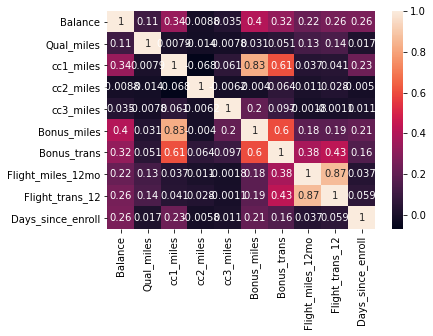

In [46]:
sns.heatmap(df.corr(), annot = True)

In [68]:
array=df.values

In [69]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [70]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [71]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [72]:
EWA_dbscan=pd.DataFrame(dbscan.labels_,columns=['dbscan_cluster'])

In [73]:
EWA_dbscan

,dbscan_cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,0
3995,0
3996,0
3997,0


In [74]:
pd.concat([df,EWA_dbscan],axis=1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,dbscan_cluster
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,-1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [75]:
(EWA_dbscan['dbscan_cluster']==-1).value_counts()

False    3320
True      679
Name: dbscan_cluster, dtype: int64

In [76]:
EWA_dbscan['dbscan_cluster'].nunique()

7

In [77]:
# DBSCAN is used to find no. of clusters and mainly the outliers

In [78]:
from sklearn.preprocessing import StandardScaler
std_df=StandardScaler().fit_transform(df)

In [79]:
std_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

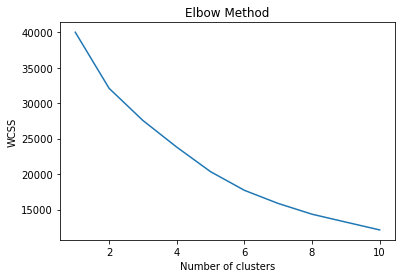

In [80]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [81]:
from sklearn.cluster import KMeans
kmeans= KMeans(3, random_state=42)
kmeans.fit(std_df)

KMeans(n_clusters=3, random_state=42)

In [82]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [83]:
kmeans=pd.DataFrame(kmeans.labels_,columns=['kmeans_cluster'])

In [84]:
kmeans_EWA=pd.concat([df,kmeans],axis=1)

In [85]:
kmeans_EWA.groupby('kmeans_cluster').agg(['mean']).reset_index()

,kmeans_cluster,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,115619.195086,138.821296,3.694713,1.001489,1.032018,38969.262844,18.758004,317.138496,0.946389,4830.054356
1,1,42610.891208,104.475713,1.169811,1.020072,1.000401,4341.215175,6.704135,212.147732,0.646327,3692.771979
2,2,199463.030303,785.624242,2.181818,1.036364,1.030303,32803.351515,27.296970,5365.975758,15.830303,4755.521212


In [86]:
(kmeans_EWA['kmeans_cluster']).value_counts()

1    2491
0    1343
2     165
Name: kmeans_cluster, dtype: int64


By looking at the mean of the parameters and the no. of customers in each clusters we can draw the following interferences - Cluster 2 (High Frequency Travellers): This cluster has the lowest number of customers (165 customers) . These customers travel very frequently and have covered the maximum flight miles in the past 12 months.Hence, they have accrued the maximum balance.They have also made a significant number of non-flight transactions in the past 12 months. They also have the maximum number of miles counted as qualifying for Top Flight Status.

Cluster 1 (Not-so-frequent Travellers): This cluster has the highest number of customers(2491 customers). They are new customers who don’t travel as frequently compared to the other two segments and have the least flight miles eligible for award travel.

Cluster 0 (Loyal Customers): This cluster has 1343 number of the customers. They are the oldest customers who have been travelling consistently since the time of enrollment. They use the frequent flyer credit card very often and have earned the maximum number of miles from non-flight bonus transactions in the past 12 months.

In [87]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [88]:
EAW_hc=df.values

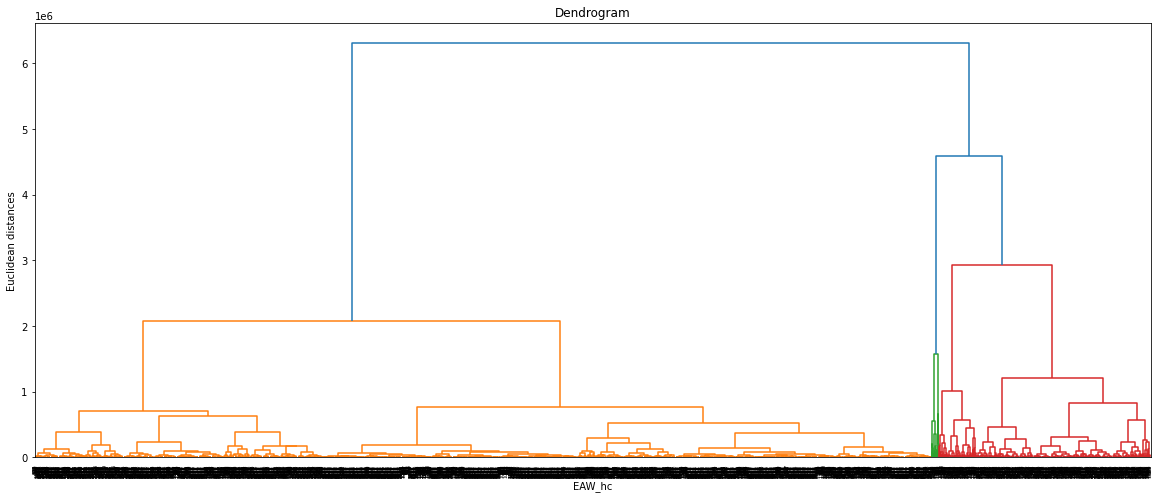

In [89]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(EAW_hc, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('EAW_hc')
plt.ylabel('Euclidean distances')
plt.show()

In [90]:
hc = AgglomerativeClustering(n_clusters=3,affinity = 'euclidean', linkage = 'ward')

In [91]:
y_hc = hc.fit_predict(EAW_hc)

In [92]:
Clusterslabels=pd.DataFrame(y_hc,columns=['hc_Clusters'])

In [93]:
Clusterslabels.head()

,hc_Clusters
0,1
1,1
2,1
3,1
4,1


In [94]:
hc_EWA=pd.concat([df,Clusterslabels],axis=1)

In [95]:
(hc_EWA['hc_Clusters']).value_counts()

1    3215
0     758
2      26
Name: hc_Clusters, dtype: int64

Cluster 2 (High Frequency Travellers) Cluster 1 (Not-so-frequent Travellers) Cluster 0 (Loyal Customers)

There are 4000 passengers and we have there past history information.By Clustering we could divide the passengers in few clusters then which set of clusters can be awarded with free flight or not by introducing some new marketing campaign on clusters with high clustomers to make them high frequency travellers.